# Simulation

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time
from scipy.optimize import curve_fit
import heapq
from matplotlib import rc

In [3]:
def Protocol(time, budget, size, rates, tape, opt_reward):
    ''' 
    Interaction between the algorithm and the enviornment
    input: time horizon T, algorithm budget, algorithm epoch size, reward rates, reward tape, optimal reward
    output: reward tape of N samples, optimal reward, expected algorithm reward, expected regret
    '''
        
    alg_rewards = []    
  
    for i in range(N):
        alg_reward = BudgetedExploration(time, budget, size, rates, tape[i])
      
        alg_rewards.append(alg_reward)

    exp_reward = np.mean(alg_rewards)
  
    regret = opt_reward - exp_reward
    
    return regret

In [4]:
def BudgetedExploration(time, budget, size, rates, tape):
    ''' 
    Budgeted Exploration Algorithm 
    input: time horizon T, exploration budget, epoch size, reward rates, reward tape
    output: algorithm rewards
    '''
    alg_reward = 0
    t = 0
    while t < time:
        epoch_tape = tape[t: min(t+size, time)]
        cum_reward = np.cumsum(epoch_tape)  # cumulative rewards of the tape in each epoch
        index = np.where(cum_reward <= -budget)[0]  # cumulative rewards when the budget is run out
        if np.any(index) == False:  # if the budget is not run out, choose the changing arm till the end of the epoch
            epoch_reward = cum_reward[-1]
        else:
            epoch_reward = cum_reward[index[0]]
        alg_reward = alg_reward + epoch_reward
        t = t+size
    return alg_reward

In [5]:
def Instance(step, f, A, phi): 
    '''
    Generate an instance (reward rates of the changing arm). For example, a sine curve with random amplitude, frequency, and phase shift.
    More concretely, consider f(x; A, f, phi) = A * sin(pi*f*x + phi) where A, f, and phi are amplitude, (2*)frequency, and phase shift
    imput: time step 1/T
    output: reward rates of the changing arm
    '''
    
    instance = -A*np.sin(f*pi*np.arange(0,1,step)+phi)
   
    return instance

In [6]:
def OPT(rates):
    '''
    Get the optimal reward of an instance of rates
    '''

    opt_reward = np.sum(rates[rates>0])  # recall that the optimal policy receives reward max(0, E[tape[t]]) at time t
    
    return opt_reward

In [7]:
def Sampling(time, rates, N):
    ''' 
    Generate the reward tape (N reward samples) of the changing arm given a reward rate instance
    input: time horizon T, reward rates, number of reward samples N
    output: reward tape of N samples
    '''
    tape = np.random.normal(rates, 0.0001, size=(N, time))

    return tape

In [11]:
'''
This is the main function.
'''

program_start = time.time()

N = 5  # number of reward samples for each reward rate instance
M = 100  # number of random sine curves
H = 26  # max time horizon is T=2^26
L = 10  # min time horizon is T=2^(26-10+1)=2^17
pi = 3.14

phaseshifts = np.random.uniform(0, 2*pi, M)  # phi~U([0,2*pi])
frequencies = np.random.uniform(5, 10, M)  # f~U([5,10])
amplitudes = np.random.normal(frequencies**(-2),0.001,M)  # A~N(f^(-2),0.001)

regrets1 = []
regrets2 = []

opt_rewards = []


for k in range(M):
    start = time.time()
    frequency = frequencies[k]
    amplitude = amplitudes[k]
    phaseshift = phaseshifts[k]
    
    regret_curve1 = []
    regret_curve2 = []
    
    opt_curve = []
    
    s = 2**(-H)
    T = 2**H  # start with time horizon T=2^H
    rates = Instance(step=s, f=frequency, A=amplitude, phi=phaseshift)  
    tape = Sampling(time=T, rates=rates, N=N)  # generate the tape (realized rewards) of the changing arm
        
    for i in range(L):
        B1 = T**(1/3)
        Delta1 = int(T**(2/3))
        B2 = T**(2/5)
        Delta2 = int(T**(4/5))
        
        opt_reward = OPT(rates=rates)
        opt_curve.append(opt_reward)

        regret1 = Protocol(time=T, budget=B1, size=Delta1, rates = rates, tape = tape, opt_reward = opt_reward)
        regret_curve1.append(regret1)

        regret2 = Protocol(time=T, budget=B2, size=Delta2, rates = rates, tape = tape, opt_reward = opt_reward)
        regret_curve2.append(regret2)
        
        s = s*2
        T = int(T/2)  # consider time horizon T/2 next
        
        rates = rates[::2]  # rates of time horizon T/2, by selecting the even elements from rates of time horizon T
        tape = tape[:,::2]  # tape of time horizon T/2, by selecting the even elements from tape of time horizon T 
        

    regrets1.append(regret_curve1)
    regrets2.append(regret_curve2)
    
    opt_rewards.append(opt_curve)
    end = time.time()
    print(k, end-start)
    
program_end = time.time()
print("program time", program_end-program_start)

0 16.003285884857178
1 16.327141761779785
2 17.637967109680176
3 16.53035593032837
4 16.078962802886963
5 16.501824140548706
6 16.068490028381348
7 16.808427095413208
8 17.132213830947876
9 18.02362895011902
10 16.087251901626587
11 17.10847806930542
12 19.842705965042114
13 16.031070947647095
14 16.48984980583191
15 19.876941919326782
16 16.759784936904907
17 18.130582094192505
18 18.06951880455017
19 16.839517831802368
20 16.050912857055664
21 16.045924186706543
22 16.436959981918335
23 17.060127019882202
24 16.491881847381592
25 16.5091769695282
26 16.033816814422607
27 17.601407051086426
28 16.79914903640747
29 16.22865605354309
30 16.50263810157776
31 16.949506044387817
32 16.545390129089355
33 16.13532519340515
34 16.307997941970825
35 16.248843908309937
36 16.112773895263672
37 16.172845125198364
38 16.7489230632782
39 16.191357851028442
40 17.15384793281555
41 18.49708390235901
42 17.050384044647217
43 16.106000900268555
44 16.28490400314331
45 16.920514583587646
46 16.33258104

In [12]:
shifted_opt = opt_rewards+np.outer(amplitudes, 2**np.arange(26,16,-1))  #shift the optimal rewards up with the amplitudes

In [25]:
relative_regret1 = np.divide(regrets1, shifted_opt)  # relative regret is the ratio between the regrets and the optimal rewards
relative_regret2 = np.divide(regrets2, shifted_opt)

In [26]:
normalized_curve1 = np.mean(relative_regret1, axis=0)  # curve of the expected relative regret
normalized_curve2 = np.mean(relative_regret2, axis=0)

(array([-6. , -5.5, -5. , -4.5, -4. , -3.5, -3. , -2.5, -2. ]),
 [Text(0, -6.0, '−6.0'),
  Text(0, -5.5, '−5.5'),
  Text(0, -5.0, '−5.0'),
  Text(0, -4.5, '−4.5'),
  Text(0, -4.0, '−4.0'),
  Text(0, -3.5, '−3.5'),
  Text(0, -3.0, '−3.0'),
  Text(0, -2.5, '−2.5'),
  Text(0, -2.0, '−2.0')])

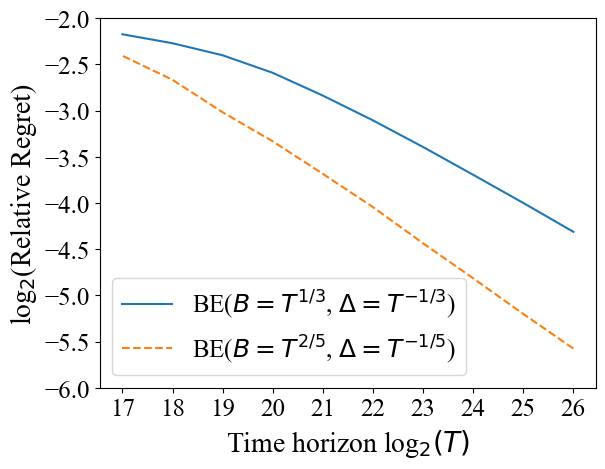

In [18]:
'''
Log-log plot of the relative regrets
'''
plt.rcParams["font.family"] = "Times New Roman"
x = np.arange(26,16,-1)
plt.plot(x, np.log2(normalized_curve1), label="BE($B=T^{1/3}$, $\Delta=T^{-1/3}$)")
plt.plot(x, np.log2(normalized_curve2), '--', label="BE($B=T^{2/5}$, $\Delta=T^{-1/5}$)")
plt.legend(fontsize=18)
plt.xlabel('Time horizon log$_2(T)$', fontsize=20)
plt.ylabel('log$_2$(Relative Regret)', fontsize=20)
plt.yticks(np.arange(-6,-1.5,0.5))
plt.xticks(np.arange(17,27))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Appendix
Below are the data generated in the simulation.

In [16]:
amplitudes

array([0.01038743, 0.01243772, 0.03144206, 0.01429333, 0.03621676,
       0.01433425, 0.01163338, 0.0111186 , 0.02571095, 0.02067458,
       0.01406845, 0.01163763, 0.01785191, 0.0174269 , 0.03973469,
       0.01450638, 0.0261629 , 0.03104869, 0.03761056, 0.01168587,
       0.0191924 , 0.01390507, 0.02583039, 0.00879294, 0.01853921,
       0.01856759, 0.01288979, 0.01383596, 0.01426768, 0.01363091,
       0.01152668, 0.03465673, 0.02170529, 0.0153201 , 0.01840351,
       0.02523029, 0.02461771, 0.01041639, 0.03471461, 0.01068853,
       0.03592607, 0.03788347, 0.02105504, 0.01938202, 0.02209411,
       0.01229393, 0.01520198, 0.01319102, 0.01371655, 0.02539411,
       0.02193877, 0.0239789 , 0.01717182, 0.01772122, 0.02600272,
       0.01410078, 0.01649327, 0.02662151, 0.0121912 , 0.01575328,
       0.01210087, 0.03904851, 0.01315237, 0.02357378, 0.03246014,
       0.01531729, 0.01230036, 0.01075663, 0.02725382, 0.04090433,
       0.01196914, 0.01219861, 0.01067053, 0.01159013, 0.01565

In [17]:
frequencies

array([9.64527018, 9.46910537, 5.62612689, 8.20587289, 5.23007837,
       7.87825075, 9.30084319, 8.41266241, 6.04253974, 7.11994878,
       8.43879643, 8.53451633, 7.61442642, 7.29446349, 5.06897733,
       8.51172364, 6.12665498, 5.66442211, 5.09597238, 8.8727841 ,
       7.25938863, 8.28554862, 5.87762665, 9.94716364, 7.3743177 ,
       6.936154  , 8.38157907, 9.19957564, 8.27339667, 8.36668212,
       8.72795028, 5.48989881, 6.80349843, 8.41513168, 7.52053171,
       6.23077711, 6.48404765, 9.33571442, 5.44203089, 9.08913488,
       5.3212442 , 5.20090152, 6.91119456, 7.07935523, 6.77253832,
       9.0324174 , 7.96180694, 9.28153244, 8.85480433, 6.13671767,
       6.72936871, 6.65763038, 7.48392069, 7.41156439, 6.38798425,
       8.39183687, 7.8148161 , 6.16981644, 9.0043277 , 7.90897999,
       8.9752568 , 5.07621299, 8.89260729, 6.60419133, 5.54607455,
       7.88635676, 9.19728061, 9.22436373, 6.0625756 , 5.07489766,
       9.4971584 , 8.65950308, 9.02714937, 9.21219701, 8.44695

In [18]:
phaseshifts

array([0.42463576, 0.98619468, 6.0817872 , 1.80799331, 0.29014234,
       0.82969359, 0.72322558, 3.13131512, 3.69252389, 5.77232614,
       0.20508994, 4.42469589, 4.21347382, 1.61755751, 2.36859117,
       2.57951208, 1.28892972, 4.51181106, 0.48848352, 1.33100407,
       0.92624822, 5.92765819, 1.06011701, 1.34876655, 3.02022233,
       5.47876977, 5.0749866 , 5.74860041, 1.80183899, 1.86750208,
       3.11680163, 1.69500387, 2.04617058, 4.97036873, 2.53062427,
       0.03289367, 2.26423374, 3.47751186, 3.86804344, 5.15805191,
       0.41849522, 2.11097101, 4.85988996, 2.85355998, 2.24610689,
       3.68241246, 2.42118746, 4.71872877, 1.22012394, 5.27007394,
       5.51348675, 0.39648299, 3.05034439, 0.90839458, 0.34685469,
       5.76603724, 3.70198907, 4.58008943, 4.21069125, 5.58273206,
       3.70562041, 0.85739268, 2.09760214, 5.00968196, 3.3069695 ,
       2.16445283, 0.22590294, 2.40761404, 1.44036341, 1.56651049,
       2.79154398, 4.3991533 , 5.76950695, 2.55913565, 1.91204

In [19]:
regrets1

[[77547.22704342977,
  47921.420945575264,
  29373.56498936381,
  17887.104236106687,
  10729.899895466422,
  6292.485332638818,
  3524.7291330620374,
  1782.2300884179308,
  891.1208703840653,
  445.5497493295479],
 [76860.9442618223,
  47609.62797581116,
  29342.15438110396,
  17944.77416485142,
  10884.301613179257,
  6516.753403978599,
  3799.4550995556824,
  2094.8697299117866,
  1047.3985815589274,
  523.6945582728708],
 [85977.25086017745,
  53799.08159263199,
  33612.4397655901,
  20952.172883892606,
  13025.95400535459,
  8067.833021561084,
  4969.115407895071,
  3038.519666131736,
  1839.0521141664399,
  1100.057020259237],
 [80529.70810690508,
  49958.308751306395,
  30816.602219492845,
  18976.190835951733,
  11589.14285633186,
  6978.482030952529,
  4142.220663541702,
  2376.016049584492,
  1240.4034671006305,
  620.184544590945],
 [90195.90486916876,
  56548.75662220741,
  35398.655789777404,
  22139.360435098824,
  13809.381823765703,
  8611.996084109594,
  5321.20749783

In [20]:
regrets2

[[30177.523403099884,
  20781.125717668066,
  14134.16083761202,
  7153.954096092453,
  5529.62150173545,
  3679.7441805819526,
  2347.6146442785794,
  1381.251680893103,
  821.6924325331092,
  445.5497493295484],
 [33651.5257495002,
  20463.074951995804,
  13142.537194649674,
  8645.449553898608,
  5817.261196368123,
  3370.6957290874225,
  2326.2691853408223,
  1646.5991195385461,
  916.1986457091069,
  523.6945582728705],
 [34389.29840722692,
  23566.155342559505,
  13337.552932179125,
  9809.284907542256,
  6471.26474628468,
  4840.82028567083,
  2594.01050423618,
  2150.924811416798,
  1180.0688898932276,
  709.1962177593898],
 [33298.35253636929,
  22410.573654845837,
  13318.155084284721,
  8077.454144908519,
  5684.326374676377,
  3770.390121006393,
  2597.566946079721,
  1598.6893688004502,
  992.3850634956932,
  576.491173189076],
 [49905.05848145322,
  21823.495383671136,
  14740.563160926482,
  9910.79805337949,
  6309.761761410889,
  3601.292029110464,
  2410.075177929899,

In [21]:
opt_rewards

[[224678.41978805166,
  112339.2082108913,
  56169.602422311385,
  28084.79952802138,
  14042.398080869434,
  7021.197357293137,
  3510.5969955242795,
  1755.2968146164512,
  877.6467240510365,
  438.8216789816653],
 [274182.96823871543,
  137091.48212396805,
  68545.73906659568,
  34272.867537904654,
  17136.431773568147,
  8568.213891390158,
  4284.104950267864,
  2142.050479714487,
  1071.0232445171644,
  535.509626401475],
 [621690.8303851289,
  310845.40903986985,
  155422.69836724174,
  77711.34303092801,
  38855.66536277535,
  19427.82652869882,
  9713.907111675611,
  4856.9474031762875,
  2428.467549038554,
  1214.2276220180474],
 [297816.57272586296,
  148908.28636293122,
  74454.14318146424,
  37227.07159072916,
  18613.535795371452,
  9306.767897692787,
  4653.383948854037,
  2326.691974389963,
  1163.3459871732102,
  581.672992913708],
 [660596.7736560376,
  330298.3791866353,
  165149.18195193805,
  82574.58333459204,
  41287.28402591024,
  20643.63437157137,
  10321.80954

In [22]:
shifted_opt

array([[9.21767047e+05, 4.60883522e+05, 2.30441759e+05, 1.15220878e+05,
        5.76104373e+04, 2.88052170e+04, 1.44026068e+04, 7.20130171e+03,
        3.60064917e+03, 1.80032290e+03],
       [1.10886423e+06, 5.54432112e+05, 2.77216054e+05, 1.38608025e+05,
        6.93040105e+04, 3.46520033e+04, 1.73259996e+04, 8.66299782e+03,
        4.33149692e+03, 2.16574646e+03],
       [2.73173176e+06, 1.36586587e+06, 6.82932930e+05, 3.41466459e+05,
        1.70733223e+05, 8.53666055e+04, 4.26832966e+04, 2.13416422e+04,
        1.06708149e+04, 5.33540131e+03],
       [1.25702571e+06, 6.28512856e+05, 3.14256428e+05, 1.57128214e+05,
        7.85641070e+04, 3.92820535e+04, 1.96410267e+04, 9.82051337e+03,
        4.91025669e+03, 2.45512834e+03],
       [3.09106240e+06, 1.54553119e+06, 7.72765587e+05, 3.86382786e+05,
        1.93191385e+05, 9.65956850e+04, 4.82978349e+04, 2.41489098e+04,
        1.20744473e+04, 6.03721599e+03],
       [1.27304477e+06, 6.36522384e+05, 3.18261192e+05, 1.59130596e+05,
   

In [27]:
relative_regret1

array([[0.08412888, 0.10397729, 0.12746633, 0.15524187, 0.18624924,
        0.2184495 , 0.24472855, 0.24748721, 0.24748895, 0.24748324],
       [0.06931502, 0.08587098, 0.1058458 , 0.12946418, 0.15705154,
        0.18806282, 0.21929211, 0.24181811, 0.24180984, 0.24180788],
       [0.03147353, 0.03938826, 0.04921778, 0.06135939, 0.0762942 ,
        0.09450807, 0.11641827, 0.14237516, 0.17234411, 0.20618075],
       [0.06406369, 0.07948653, 0.09806196, 0.12076883, 0.14751193,
        0.17765064, 0.21089634, 0.24194418, 0.25261479, 0.25260779],
       [0.02917958, 0.03658856, 0.04580775, 0.05729903, 0.07148032,
        0.08915508, 0.11017487, 0.13573778, 0.1664351 , 0.20061014],
       [0.06042239, 0.07493616, 0.09225471, 0.11328651, 0.13779555,
        0.1659325 , 0.19665268, 0.22627195, 0.23728731, 0.23728866],
       [0.07756362, 0.09599484, 0.11816327, 0.14440128, 0.17459162,
        0.20795675, 0.24025131, 0.25464306, 0.2546436 , 0.25464772],
       [0.07362368, 0.09091911, 0.1115916

In [28]:
relative_regret2

array([[0.03273877, 0.04508976, 0.06133507, 0.06208904, 0.09598298,
        0.12774575, 0.16299929, 0.19180583, 0.22820675, 0.24748324],
       [0.03034774, 0.03690817, 0.047409  , 0.06237337, 0.08393831,
        0.09727275, 0.13426464, 0.19007267, 0.2115201 , 0.24180788],
       [0.01258883, 0.01725364, 0.01952981, 0.02872694, 0.03790279,
        0.05670625, 0.06077343, 0.10078535, 0.11058845, 0.13292275],
       [0.02648979, 0.03565651, 0.0423799 , 0.05140677, 0.07235271,
        0.09598251, 0.1322521 , 0.16279081, 0.20210452, 0.23481101],
       [0.01614495, 0.01412038, 0.01907508, 0.02565021, 0.03266068,
        0.03728212, 0.04990027, 0.07552251, 0.0966996 , 0.11570365],
       [0.02755001, 0.03012108, 0.04542028, 0.05860901, 0.06779155,
        0.09116951, 0.1258115 , 0.14071004, 0.15089814, 0.21587504],
       [0.02755652, 0.03993355, 0.05351729, 0.06685031, 0.08563863,
        0.12287496, 0.15241338, 0.1548167 , 0.23556771, 0.25464772],
       [0.02960753, 0.03763714, 0.0536243

In [23]:
normalized_curve1
normalized_curve2

[0.0503312  0.06250526 0.07720169 0.09509382 0.11609898 0.13983222
 0.1658638  0.18918954 0.20708399 0.221462  ]
[0.02096112 0.02718987 0.03551446 0.04617724 0.06057452 0.07773382
 0.09921073 0.12339364 0.15737653 0.18852181]


In [10]:
np.log2(normalized_curve1)

array([-4.31240319, -3.99987859, -3.69522376, -3.3945046 , -3.1065728 ,
       -2.83823127, -2.59192904, -2.40209577, -2.27171207, -2.17486892])

In [11]:
np.log2(normalized_curve2)

array([-5.57614038, -5.20078694, -4.81544964, -4.43667424, -4.04514512,
       -3.68531377, -3.33336003, -3.01866006, -2.66770769, -2.40719666])

# Log-log plot for camera-ready

In [4]:
mean_regret1 = np.mean(regrets1,axis=0)
mean_regret1

array([78596.39231874, 48904.75742999, 30287.87131505, 18728.33715413,
       11492.35120487,  6970.20966542,  4185.44793299,  2440.5861415 ,
        1376.68007755,   759.80584821])

In [6]:
mean_regret2 = np.mean(regrets2,axis=0)
mean_regret2

array([32884.36354822, 21335.98864207, 13895.74329859,  9058.66176709,
        5957.51739624,  3808.98224066,  2445.52149744,  1533.62893684,
         985.21270747,   605.99207612])

(array([11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5]),
 [Text(0, 11.0, '11.0'),
  Text(0, 11.5, '11.5'),
  Text(0, 12.0, '12.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 13.0, '13.0'),
  Text(0, 13.5, '13.5'),
  Text(0, 14.0, '14.0'),
  Text(0, 14.5, '14.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 15.5, '15.5'),
  Text(0, 16.0, '16.0'),
  Text(0, 16.5, '16.5')])

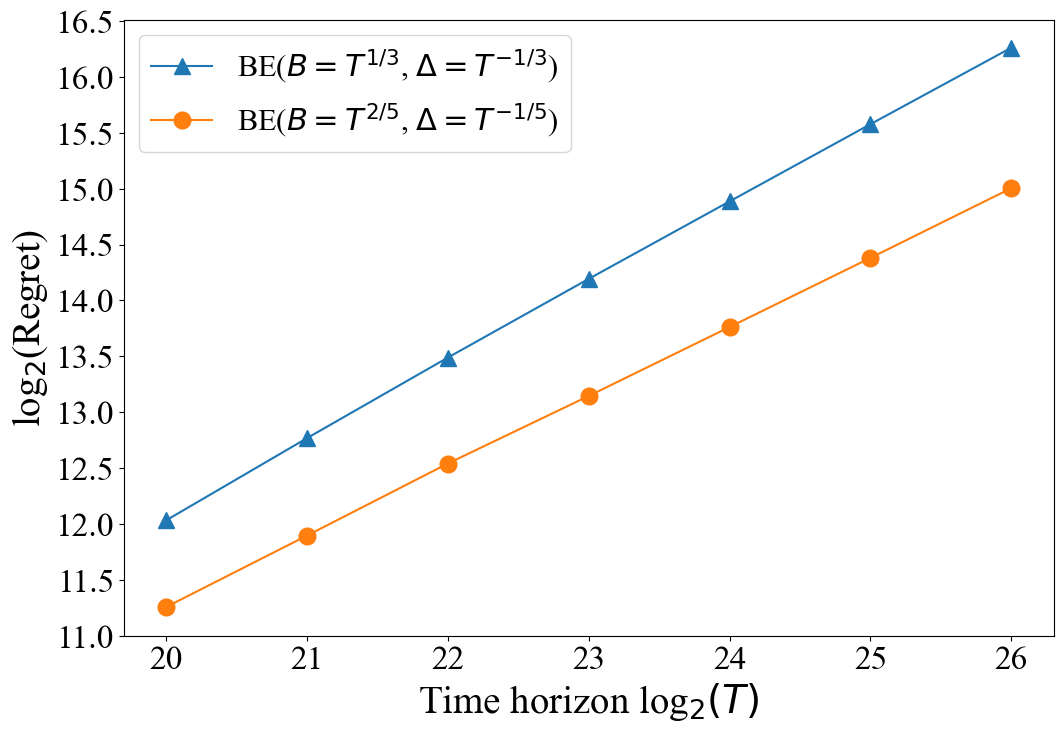

In [21]:
'''
Log-log plot of the relative regrets
'''
plt.gcf().set_size_inches(12, 8)
plt.rcParams["font.family"] = "Times New Roman"

plt.plot(np.arange(26,19,-1), np.log2(mean_regret1[:7]), '-^', label="BE($B=T^{1/3}$, $\Delta=T^{-1/3}$)", markersize=12)
plt.plot(np.arange(26,19,-1), np.log2(mean_regret2[:7]), '-o', label="BE($B=T^{2/5}$, $\Delta=T^{-1/5}$)", markersize=12)
plt.legend(fontsize=22)
plt.xlabel('Time horizon log$_2(T)$', fontsize=28)
plt.ylabel('log$_2$(Regret)', fontsize=28)
plt.xticks(np.arange(20,27))
plt.yticks(np.arange(11,17,0.5))
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

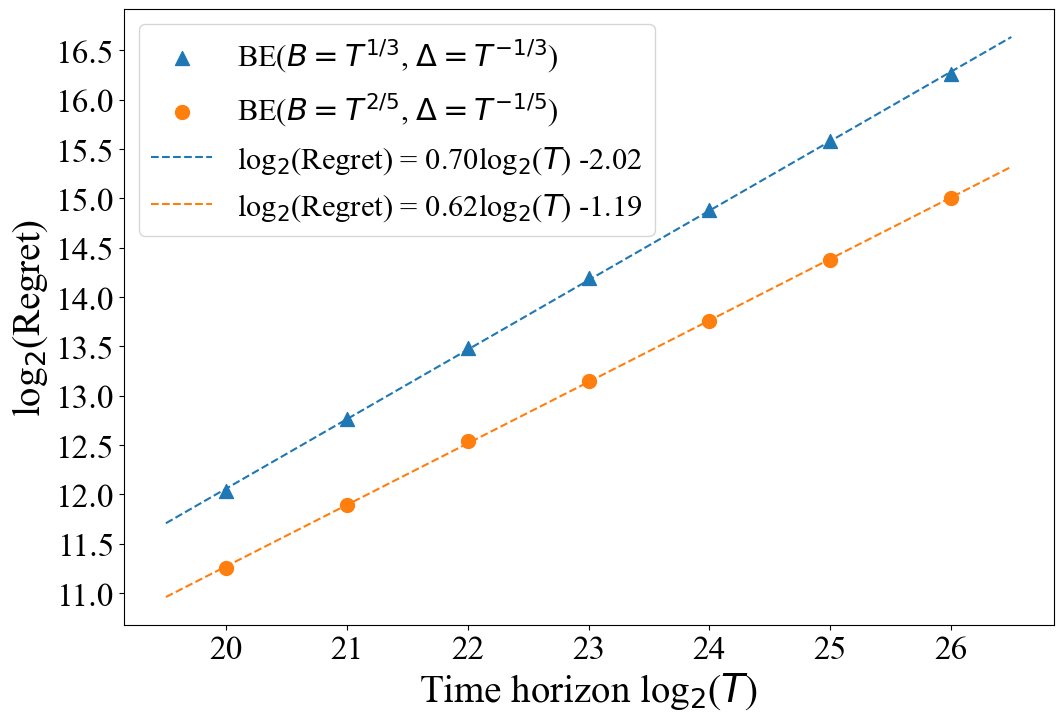

In [5]:
# Given data
x = np.array([26, 25, 24, 23, 22, 21, 20])
y1 = np.array([16.26217547, 15.5776872, 14.88645257, 14.19293519, 13.48838637, 12.76698634, 12.03116632])
y2 = np.array([15.00511413, 14.38100134, 13.76235539, 13.14508222, 12.54049554, 11.89518985, 11.25592643])

# Perform linear regression to find the best-fit line for y1
slope1, intercept1 = np.polyfit(x, y1, 1)

# Perform linear regression to find the best-fit line for y2
slope2, intercept2 = np.polyfit(x, y2, 1)

# Use Times New Roman font for LaTeX rendering
rc('font', family='Times New Roman')

# Plot the data points and the best-fit lines
plt.gcf().set_size_inches(12, 8)

plt.scatter(x, y1, label="BE($B=T^{1/3}$, $\Delta=T^{-1/3}$)", marker='^', s=100)
plt.scatter(x, y2, label="BE($B=T^{2/5}$, $\Delta=T^{-1/5}$)", marker='o', s=100)

x_extended = np.arange(min(x) - 0.5, max(x) + 1, 0.5)

plt.plot(x_extended, slope1 * x_extended + intercept1, '--', label="log$_2$(Regret) = {:.2f}log$_2$($T$) {:.2f}".format(slope1, intercept1))
plt.plot(x_extended, slope2 * x_extended + intercept2, '--', label="log$_2$(Regret) = {:.2f}log$_2$($T$) {:.2f}".format(slope2, intercept2))

plt.legend(fontsize=22)
plt.xlabel('Time horizon log$_2$($T$)', fontsize=28)
plt.ylabel('log$_2$(Regret)', fontsize=28)
plt.xticks(np.arange(20, 27))
plt.yticks(np.arange(11, 17, 0.5))
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.show()

In [8]:
np.log2(mean_regret1[:7])

array([16.26217547, 15.5776872 , 14.88645257, 14.19293519, 13.48838637,
       12.76698634, 12.03116632])

In [9]:
np.log2(mean_regret2[:7])

array([15.00511413, 14.38100134, 13.76235539, 13.14508222, 12.54049554,
       11.89518985, 11.25592643])